## -- tensorflow를 이용한 mnist 예제 --

In [18]:
import matplotlib.pyplot as plt  # 그림으로 보기 위한 matplotlib 라이브러리 import
from tensorflow.keras.datasets import mnist  # 라이브러리가 기본으로 제공하는 mnist 데이터셋
from tensorflow.keras.utils import to_categorical  # one-hot encoding 을 위한 함수
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층
from tensorflow.keras.models import load_model  # 저장된 모델 불러오기

### 데이터 불러오기

X_train_shape: (60000, 28, 28)
y_train_shape: (60000,)
X_test_shape: (10000, 28, 28)
y_test_shape: (10000,)


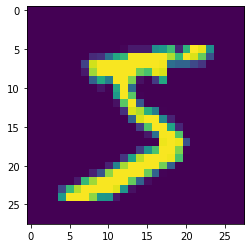

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터셋 차원 확인
print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 28, 28)
print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000,)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 28, 28)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000,)

plt.imshow(X_train[0])
plt.show()

### 데이터 전처리

In [20]:
input_shape = X_train.shape[1] * X_train.shape[2]  # 그림의 크기: 28 * 28
number_of_classes = len(set(y_train))  # 레이블의 종류. 0~9로 10개

X_train = X_train / 255.0
X_test = X_test / 255
X_train = X_train.reshape(-1, input_shape)  # 3차원 -> 2차원
X_test = X_test.reshape(-1, input_shape)

print(f"X_train_shape: {X_train.shape}")  # X_train_shape: (60000, 784)
print(f"X_test_shape: {X_test.shape}")  # X_test_shape: (10000, 784)

X_train_shape: (60000, 784)
X_test_shape: (10000, 784)


In [22]:
y_train = to_categorical(y_train, number_of_classes)  # 원-핫 인코딩. 1차원 -> 2차원
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")  # y_train_shape: (60000, 10)
print(f"y_test_shape: {y_test.shape}")  # y_test_shape: (10000, 10)

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


### 모델 정의 및 컴파일

In [23]:
model = Sequential()  # 모델 선언

- Sequential 모델은 각 레이어에 정확히 하나의 입력 텐서와 하나의 출력 텐서가 있는 일반 레이어 스택에 적합

In [24]:
model.add(Dense(128, activation="relu", input_shape=X_train.shape[1:]))

In [25]:
model.add(Dense(y_train.shape[1], activation="softmax"))
# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용

In [26]:
# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 모델 학습 및 검증

In [27]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)
print("손실률:", loss)
print("정확도:", acc) 

Epoch 1/10
1500/1500 [==============================] - 1s 845us/step - loss: 0.2874 - acc: 0.9167 - val_loss: 0.1556 - val_acc: 0.9543
Epoch 2/10
1500/1500 [==============================] - 1s 790us/step - loss: 0.1281 - acc: 0.9625 - val_loss: 0.1164 - val_acc: 0.9643
Epoch 3/10
1500/1500 [==============================] - 1s 818us/step - loss: 0.0875 - acc: 0.9742 - val_loss: 0.1040 - val_acc: 0.9697
Epoch 4/10
1500/1500 [==============================] - 1s 783us/step - loss: 0.0649 - acc: 0.9804 - val_loss: 0.1019 - val_acc: 0.9698
Epoch 5/10
1500/1500 [==============================] - 1s 793us/step - loss: 0.0493 - acc: 0.9849 - val_loss: 0.0927 - val_acc: 0.9724
Epoch 6/10
1500/1500 [==============================] - 1s 816us/step - loss: 0.0389 - acc: 0.9884 - val_loss: 0.0891 - val_acc: 0.9744
Epoch 7/10
1500/1500 [==============================] - 1s 828us/step - loss: 0.0295 - acc: 0.9914 - val_loss: 0.0839 - val_acc: 0.9758
Epoch 8/10
1500/1500 [==========================

### 학습 시각화

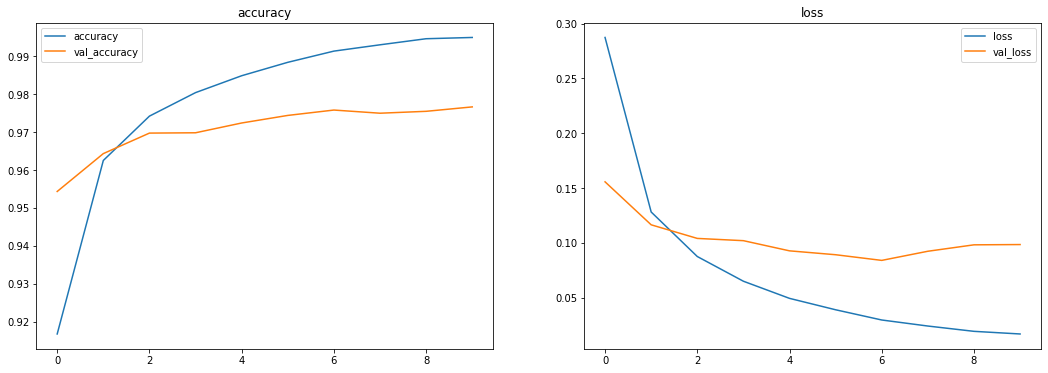

In [31]:
plt.figure(figsize=(18, 6))

# 에포크별 정확도
plt.subplot(1,2,1)
plt.plot(history.history["acc"], label="accuracy")
plt.plot(history.history["val_acc"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

# 에포크별 손실률
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

- 정확도가 떨어지며 손실은 계속 늘어나게 되면 그 모델은 학습셋에면 너무 과하게 학습한 과적합 상태라고 할 수 있음

### 모델 저장 및 불러오기

In [33]:
model.save("C:/Users/jihun/jupyterlab/datasets/mnist.h5")
loaded_model = load_model("C:/Users/jihun/jupyterlab/datasets/mnist.h5")